# Part 1: Prepare the Data

In [1]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Data loading
file_path = Path("myopia.csv")
df_myopia = pd.read_csv(file_path)
df_myopia.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [3]:
#Remove the "MYOPIC" column from the dataset.
df_myopia = df_myopia.drop(columns=["MYOPIC"])
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
# Find null values
for column in df_myopia:
    print(f"Column {column} has {df_myopia[column].isnull().sum()} null values")


Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [5]:
# Find duplicate entries
print(f"Duplicate entries: {df_myopia.duplicated().sum()}")


Duplicate entries: 0


In [6]:
#Standardize your dataset so that columns that 
#contain larger values do not influence the outcome more than columns with smaller values.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_myopia[['SPHEQ','AL','ACD','LT','VCD','SPORTHR','READHR','COMPHR','STUDYHR','TVHR','DIOPTERHR','MOMMY','DADMY']])

In [7]:
new_myopia = pd.DataFrame(scaled_data, columns=df_myopia.columns[1:])
new_myopia['AGE'] = df_myopia['AGE']
new_myopia.head()

,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,AGE
0,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241,6
1,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241,6
2,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769,6
3,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241,6
4,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769,5


# Part 2: Apply Dimensionality Reduction

In [8]:
#Perform dimensionality reduction with PCA. How did the number of the features change?


In [21]:
# Initialize PCA model
pca = PCA(n_components=9)

# Get two principal components for the data.
myopia_pca = pca.fit_transform(new_myopia)


In [22]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca, columns=["principal component 1","principal component 2","principal component 3",
                              "principal component 4","principal component 5","principal component 6",
                              "principal component 7","principal component 8","principal component 9"]
)
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9
0,0.633920,1.211704,-0.973067,-0.072744,-3.309130,-1.819535,2.572776,-1.373942,0.446869
1,-0.531796,-1.585589,-1.325585,-0.472717,0.267393,0.386821,0.288141,0.739672,0.494341
2,-0.869337,-0.737941,1.494560,0.916468,0.126491,0.271423,-0.016408,-0.188199,-0.395338
3,0.162232,1.225958,-0.478922,-2.010891,-1.884292,-0.171627,0.528774,-1.940167,-0.720705
4,-0.003746,-2.765049,0.321473,0.304226,0.419895,-1.117209,0.120480,-0.597467,0.419420


In [24]:
#explation ratio 
pca.explained_variance_ratio_

array([0.21136422, 0.16190564, 0.08793764, 0.08412782, 0.07806509,
       0.07239397, 0.06699946, 0.05734314, 0.05576281])

In [25]:
#Further reduce the dataset dimensions with t-SNE and visually inspect the results. 
#To do this, run t-SNE on the principal components, which is the output of the PCA transformation.

In [26]:
# Run t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(df_myopia_pca)

tsne_features.shape

/Users/annepizzini/opt/anaconda3/envs/PythonData38/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


(618, 2)

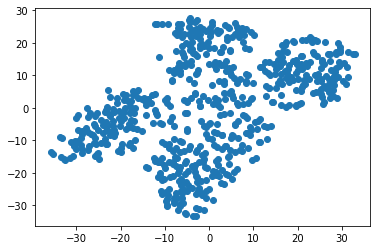

In [27]:
#Create a scatter plot of the t-SNE output. Are there distinct clusters?
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

# Part 3: Perform a Cluster Analysis with K-means

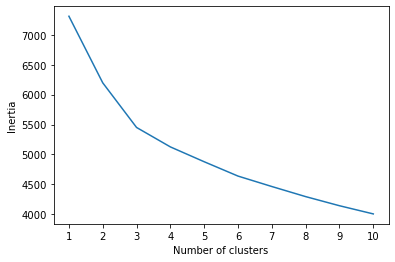

In [28]:
inertia = []
# Same as k = list(range(1, 10))
k = [1,2,3,4,5,6,7,8,9,10]

#Use a for loop to determine the inertia for each k between 1 through 10.
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_myopia_pca)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [29]:
# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(df_myopia_pca)

# Predict clusters
predictions = model.predict(df_myopia_pca)

# Add the predicted class column to the dataframe
df_myopia_pca["class"] = model.labels_
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,class
0,0.633920,1.211704,-0.973067,-0.072744,-3.309130,-1.819535,2.572776,-1.373942,0.446869,0
1,-0.531796,-1.585589,-1.325585,-0.472717,0.267393,0.386821,0.288141,0.739672,0.494341,2
2,-0.869337,-0.737941,1.494560,0.916468,0.126491,0.271423,-0.016408,-0.188199,-0.395338,1
3,0.162232,1.225958,-0.478922,-2.010891,-1.884292,-0.171627,0.528774,-1.940167,-0.720705,0
4,-0.003746,-2.765049,0.321473,0.304226,0.419895,-1.117209,0.120480,-0.597467,0.419420,2


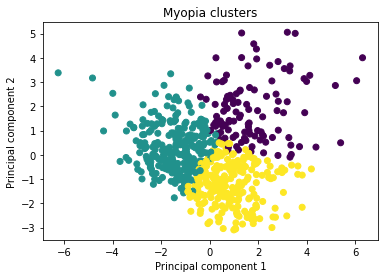

In [31]:
plt.scatter(x=df_myopia_pca['principal component 1'], y=df_myopia_pca['principal component 2'], c=df_myopia_pca['class'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Myopia clusters')
plt.show()

# Part 4: Make a Recommendation

In [ ]:
#Based on your findings, write up a brief (one or two sentences) recommendation for your 
#supervisor in your Jupyter Notebook. Can the patients be clustered? If so, into how many clusters?

Based on the finding, I would say it is possible for 3 different clusters althought it is not a clear divide. Based on the K-means graph, it would appear that the bend is at the 3 mark. Stating the best clustering is at 3. 